# House Price prediction

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

sns.set(style = 'darkgrid', font_scale = 1.6)

## Data

In [2]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
print('train shape  {}'.format(train.shape))
print('test shape  {}'.format(test.shape))
display(train.head())
display(test.head())

train shape  (1460, 81)
test shape  (1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [3]:
test_copy = test.copy()

## Handling Outliers<br>

### SalePrice Distribution

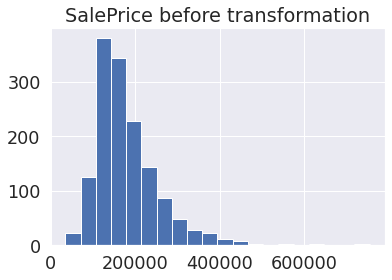

In [4]:
plt.figure()
train['SalePrice'].hist(bins=20)
plt.title('SalePrice' + ' before transformation')
plt.show()

The above plot is right skewed ,so we apply log transform to make the target variable less skew and follow Gaussian distibution , which will help to detect outliers and remove it.

In [5]:
from scipy import stats

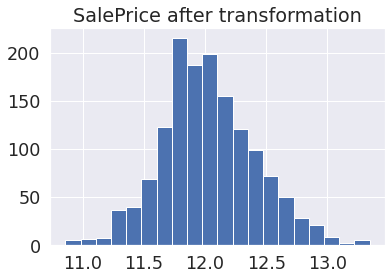

In [6]:
train['SalePrice'] = np.log(train['SalePrice'])

train['z_score_target'] = np.abs(stats.zscore(train['SalePrice']))
train = train.loc[train['z_score_target'] < 3.5].reset_index(drop=True)
del train['z_score_target']

plt.figure()
train['SalePrice'].hist(bins=20)
plt.title('SalePrice' + ' after transformation')
plt.show()

# Feature Engineering

we categorize features into three groups
- Categorical
- Nominal
- Numerical
## Categorical Features


Consider Object Dtype columns as Categorical features 


In [7]:
categorical_features = ["Alley", 'MSSubClass', 'MoSold', 'MSZoning', 'LandContour',
                        'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
                        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                        'Heating', 'CentralAir', 'Electrical', 'GarageType',
                        'GarageFinish', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

print(len(categorical_features))

26


In [8]:
nominal_features = ["BedroomAbvGr", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                    "BsmtFullBath", "BsmtHalfBath", "BsmtQual", "ExterCond", "ExterQual",
                    "Fireplaces", "FireplaceQu", "Functional", "FullBath", "GarageCars",
                    "GarageCond", "GarageQual", "HalfBath", "HeatingQC", "KitchenAbvGr",
                    "KitchenQual", "LandSlope", "LotShape", "PavedDrive", "PoolQC",
                    "Street", "Utilities", "OverallCond", "OverallQual", "TotRmsAbvGrd"]

ordinal_features = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                      'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF',
                      '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
                      'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                      'MiscVal', 'YrSold'] 
print('Nominal features length:\t',len(nominal_features),'\nOrdinal Features length:\t',len(ordinal_features))

Nominal features length:	 30 
Ordinal Features length:	 22


In [9]:
numerical_features = nominal_features + ordinal_features
total_features = nominal_features+ ordinal_features+categorical_features

In [10]:
train = train[total_features + ['SalePrice']].copy()
test = test[total_features].copy()
display(train.head())

BedroomAbvGr BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFullBath  \
0             3       TA           No          GLQ          Unf             1   
1             3       TA           Gd          ALQ          Unf             0   
2             3       TA           Mn          GLQ          Unf             1   
3             3       Gd           No          ALQ          Unf             1   
4             4       TA           Av          GLQ          Unf             1   

   BsmtHalfBath BsmtQual ExterCond ExterQual  ...  Heating CentralAir  \
0             0       Gd        TA        Gd  ...     GasA          Y   
1             1       Gd        TA        TA  ...     GasA          Y   
2             0       Gd        TA        Gd  ...     GasA          Y   
3             0       TA        TA        TA  ...     GasA          Y   
4             0       Gd        TA        Gd  ...     GasA          Y   

  Electrical  GarageType  GarageFinish Fence MiscFeature  SaleType  \
0      SBrkr      Attchd           RFn   NaN         NaN        WD   
1      SBrkr      Attchd           RFn   NaN         NaN        WD   
2      SBrkr      Attchd           RFn   NaN         NaN        WD   
3      SBrkr      Detchd           Unf   NaN         NaN        WD   
4      SBrkr      Attchd           RFn   NaN         NaN        WD   

  SaleCondition  SalePrice  
0        Normal  12.247694  
1        Normal  12.109011  
2        Normal  12.317167  
3       Abnorml  11.849398  
4        Normal  12.429216  

[5 rows x 79 columns]

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1453 non-null   int64  
 1   BsmtCond       1417 non-null   object 
 2   BsmtExposure   1416 non-null   object 
 3   BsmtFinType1   1417 non-null   object 
 4   BsmtFinType2   1416 non-null   object 
 5   BsmtFullBath   1453 non-null   int64  
 6   BsmtHalfBath   1453 non-null   int64  
 7   BsmtQual       1417 non-null   object 
 8   ExterCond      1453 non-null   object 
 9   ExterQual      1453 non-null   object 
 10  Fireplaces     1453 non-null   int64  
 11  FireplaceQu    768 non-null    object 
 12  Functional     1453 non-null   object 
 13  FullBath       1453 non-null   int64  
 14  GarageCars     1453 non-null   int64  
 15  GarageCond     1375 non-null   object 
 16  GarageQual     1375 non-null   object 
 17  HalfBath       1453 non-null   int64  
 18  HeatingQ

In [12]:
train.describe().T

count          mean          std          min         25%  \
BedroomAbvGr   1453.0      2.868548     0.813070     0.000000     2.00000   
BsmtFullBath   1453.0      0.426015     0.519122     0.000000     0.00000   
BsmtHalfBath   1453.0      0.057123     0.238017     0.000000     0.00000   
Fireplaces     1453.0      0.613214     0.643160     0.000000     0.00000   
FullBath       1453.0      1.565726     0.547328     0.000000     1.00000   
GarageCars     1453.0      1.770131     0.742837     0.000000     1.00000   
HalfBath       1453.0      0.383345     0.503074     0.000000     0.00000   
KitchenAbvGr   1453.0      1.046800     0.220845     0.000000     1.00000   
OverallCond    1453.0      5.580179     1.110279     1.000000     5.00000   
OverallQual    1453.0      6.105299     1.363356     1.000000     5.00000   
TotRmsAbvGrd   1453.0      6.520303     1.617026     3.000000     5.00000   
LotFrontage    1194.0     70.021776    24.166672    21.000000    59.00000   
LotArea        1453.0  10516.935306  9997.985436  1300.000000  7558.00000   
YearBuilt      1453.0   1971.380592    30.146915  1872.000000  1954.00000   
YearRemodAdd   1453.0   1984.971094    20.589668  1950.000000  1967.00000   
MasVnrArea     1445.0    103.377855   179.197437     0.000000     0.00000   
BsmtFinSF1     1453.0    442.958018   453.792786     0.000000     0.00000   
BsmtFinSF2     1453.0     46.773572   161.675202     0.000000     0.00000   
BsmtUnfSF      1453.0    567.775637   442.374407     0.000000   223.00000   
TotalBsmtSF    1453.0   1057.507226   435.310227     0.000000   796.00000   
1stFlrSF       1453.0   1162.971094   382.933309   372.000000   884.00000   
2ndFlrSF       1453.0    345.241569   433.033714     0.000000     0.00000   
LowQualFinSF   1453.0      5.872677    48.738447     0.000000     0.00000   
GrLivArea      1453.0   1514.085341   513.470533   438.000000  1131.00000   
GarageArea     1453.0    473.742602   212.717446     0.000000   336.00000   
WoodDeckSF     1453.0     94.317963   125.275193     0.000000     0.00000   
OpenPorchSF    1453.0     46.399862    65.187960     0.000000     0.00000   
EnclosedPorch  1453.0     21.862354    61.077190     0.000000     0.00000   
3SsnPorch      1453.0      3.426015    29.386956     0.000000     0.00000   
ScreenPorch    1453.0     15.133517    55.881824     0.000000     0.00000   
PoolArea       1453.0      2.390227    37.573873     0.000000     0.00000   
MiscVal        1453.0     43.698555   497.308264     0.000000     0.00000   
YrSold         1453.0   2007.816930     1.329187  2006.000000  2007.00000   
MSSubClass     1453.0     56.958018    42.372434    20.000000    20.00000   
MoSold         1453.0      6.323469     2.698072     1.000000     5.00000   
SalePrice      1453.0     12.027122     0.386666    10.858999    11.77529   

                       50%           75%            max  
BedroomAbvGr      3.000000      3.000000       8.000000  
BsmtFullBath      0.000000      1.000000       3.000000  
BsmtHalfBath      0.000000      0.000000       2.000000  
Fireplaces        1.000000      1.000000       3.000000  
FullBath          2.000000      2.000000       3.000000  
GarageCars        2.000000      2.000000       4.000000  
HalfBath          0.000000      1.000000       2.000000  
KitchenAbvGr      1.000000      1.000000       3.000000  
OverallCond       5.000000      6.000000       9.000000  
OverallQual       6.000000      7.000000      10.000000  
TotRmsAbvGrd      6.000000      7.000000      14.000000  
LotFrontage      70.000000     80.000000     313.000000  
LotArea        9490.000000  11600.000000  215245.000000  
YearBuilt      1973.000000   2001.000000    2010.000000  
YearRemodAdd   1994.000000   2004.000000    2010.000000  
MasVnrArea        0.000000    166.000000    1600.000000  
BsmtFinSF1      384.000000    712.000000    5644.000000  
BsmtFinSF2        0.000000      0.000000    1474.000000  
BsmtUnfSF       479.000000    808.000000    2336.000000  
TotalB

In [13]:
print('Null values: {}'.format(train.isnull().sum()))

Null values: BedroomAbvGr        0
BsmtCond           36
BsmtExposure       37
BsmtFinType1       36
BsmtFinType2       37
                 ... 
Fence            1176
MiscFeature      1399
SaleType            0
SaleCondition       0
SalePrice           0
Length: 79, dtype: int64


In [14]:
nulls = pd.DataFrame(train.isna().sum().sort_values(ascending=False),columns=['null count'])
nulls

null count
PoolQC              1447
MiscFeature         1399
Alley               1363
Fence               1176
FireplaceQu          685
...                  ...
TotalBsmtSF            0
2ndFlrSF               0
LowQualFinSF           0
GrLivArea              0
SalePrice              0

[79 rows x 1 columns]

## Find the Duplicates

Repeated duplicate values in the dataframe

In [15]:
# Duplicated rows
print(f"{train.duplicated().sum()} duplicates")

0 duplicates


# Fix Missing values

## Imputing features

In [16]:
# calculate number of rows that contain null values
nulls = train.shape[0]-train.dropna(axis = 0).shape[0]
nulls

1453

In [17]:
nums = ['BedroomAbvGr','BsmtFullBath','BsmtHalfBath',"BsmtUnfSF","TotalBsmtSF", 
        "BsmtFinSF1","BsmtFinSF2",'EnclosedPorch',"Fireplaces",'GarageArea',
        'GarageCars','HalfBath','KitchenAbvGr','LotFrontage','MasVnrArea','MiscVal',
       'OpenPorchSF','PoolArea','ScreenPorch','TotRmsAbvGrd','WoodDeckSF']

In [18]:
for feature in train.columns:
    if feature in nums:
        train[feature].fillna(0,inplace=True)
    else:
        if feature in ["Alley","MasVnrType"]:
            train.loc[:,feature] = train.loc[:,feature].fillna("None")
        elif feature in ['BsmtQual',"MiscFeature","PoolQC",'BsmtCond',"BsmtExposure","BsmtFinType1","BsmtFinType2","Fence","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond"]:
            train.loc[:, feature] = train.loc[:, feature].fillna("No")
        elif feature in ["CentralAir","PavedDrive"]:
            train.loc[:, feature] = train.loc[:, feature].fillna("N")
        elif feature in ['Condition1','Condition2']:
            train.loc[:, feature] = train.loc[:, feature].fillna("Norm")
        elif feature in ["ExterCond","ExterQual","HeatingQC","KitchenQual"]:
            train.loc[:, feature] = train.loc[:, feature].fillna("TA")
        elif feature in ['LotShape']:
            train.loc[:, feature] = train.loc[:, feature].fillna("Reg")
        elif feature =="SaleCondition":
            train.loc[:, feature] = train.loc[:, feature].fillna("Normal")
        elif feature == "Utilities":
            train.loc[:, feature] = train.loc[:, feature].fillna("AllPub")
        

In [19]:
train.isna().sum()

BedroomAbvGr     0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
                ..
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

In [20]:
for feature in test.columns:
    if feature in nums:
        test[feature].fillna(0,inplace=True)
    else:
        if feature in ["Alley","MasVnrType"]:
            test.loc[:,feature] = test.loc[:,feature].fillna("None")
        elif feature in ['BsmtQual',"MiscFeature","PoolQC",'BsmtCond',"BsmtExposure","BsmtFinType1","BsmtFinType2","Fence","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond"]:
            test.loc[:, feature] = test.loc[:, feature].fillna("No")
        elif feature in ["CentralAir","PavedDrive"]:
            test.loc[:, feature] = test.loc[:, feature].fillna("N")
        elif feature in ['Condition1','Condition2']:
            test.loc[:, feature] = test.loc[:, feature].fillna("Norm")
        elif feature in ["ExterCond","ExterQual","HeatingQC","KitchenQual"]:
            test.loc[:, feature] = test.loc[:, feature].fillna("TA")
        elif feature in ['LotShape']:
            test.loc[:, feature] = test.loc[:, feature].fillna("Reg")
        elif feature =="SaleCondition":
            test.loc[:, feature] = test.loc[:, feature].fillna("Normal")
        elif feature == "Utilities":
            test.loc[:, feature] = test.loc[:, feature].fillna("AllPub")
        elif feature == "SaleType":
            test.loc[:, feature] = test.loc[:, feature].fillna("WD")

In [21]:
test.isna().sum()

BedroomAbvGr     0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
                ..
GarageFinish     0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
Length: 78, dtype: int64

# Exploratory Data Analysis (EDA)


-Trying to find highly Correlated predictor videos with target value using Heatmap

In [22]:
cor =  train.corr()
train.corr().SalePrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.812994
GrLivArea        0.694978
GarageCars       0.677351
GarageArea       0.647682
TotalBsmtSF      0.606373
FullBath         0.588606
YearBuilt        0.587150
1stFlrSF         0.586902
YearRemodAdd     0.563380
TotRmsAbvGrd     0.528586
Fireplaces       0.485026
MasVnrArea       0.425465
BsmtFinSF1       0.362782
OpenPorchSF      0.352270
WoodDeckSF       0.329197
2ndFlrSF         0.309605
HalfBath         0.309102
LotArea          0.258037
BsmtFullBath     0.238778
BsmtUnfSF        0.223555
BedroomAbvGr     0.192614
LotFrontage      0.172768
ScreenPorch      0.123387
MoSold           0.067132
3SsnPorch        0.055927
PoolArea         0.037581
BsmtFinSF2       0.002706
BsmtHalfBath    -0.018572
MiscVal         -0.021431
YrSold          -0.035540
LowQualFinSF    -0.040272
OverallCond     -0.054464
MSSubClass      -0.083106
EnclosedPorch   -0.145268
KitchenAbvGr    -0.154495
Name: SalePrice, dtype: float64

## Check the last column in the heatmap, to find how the predictor variables are correlated to the SalePrice target variable.

<AxesSubplot:>

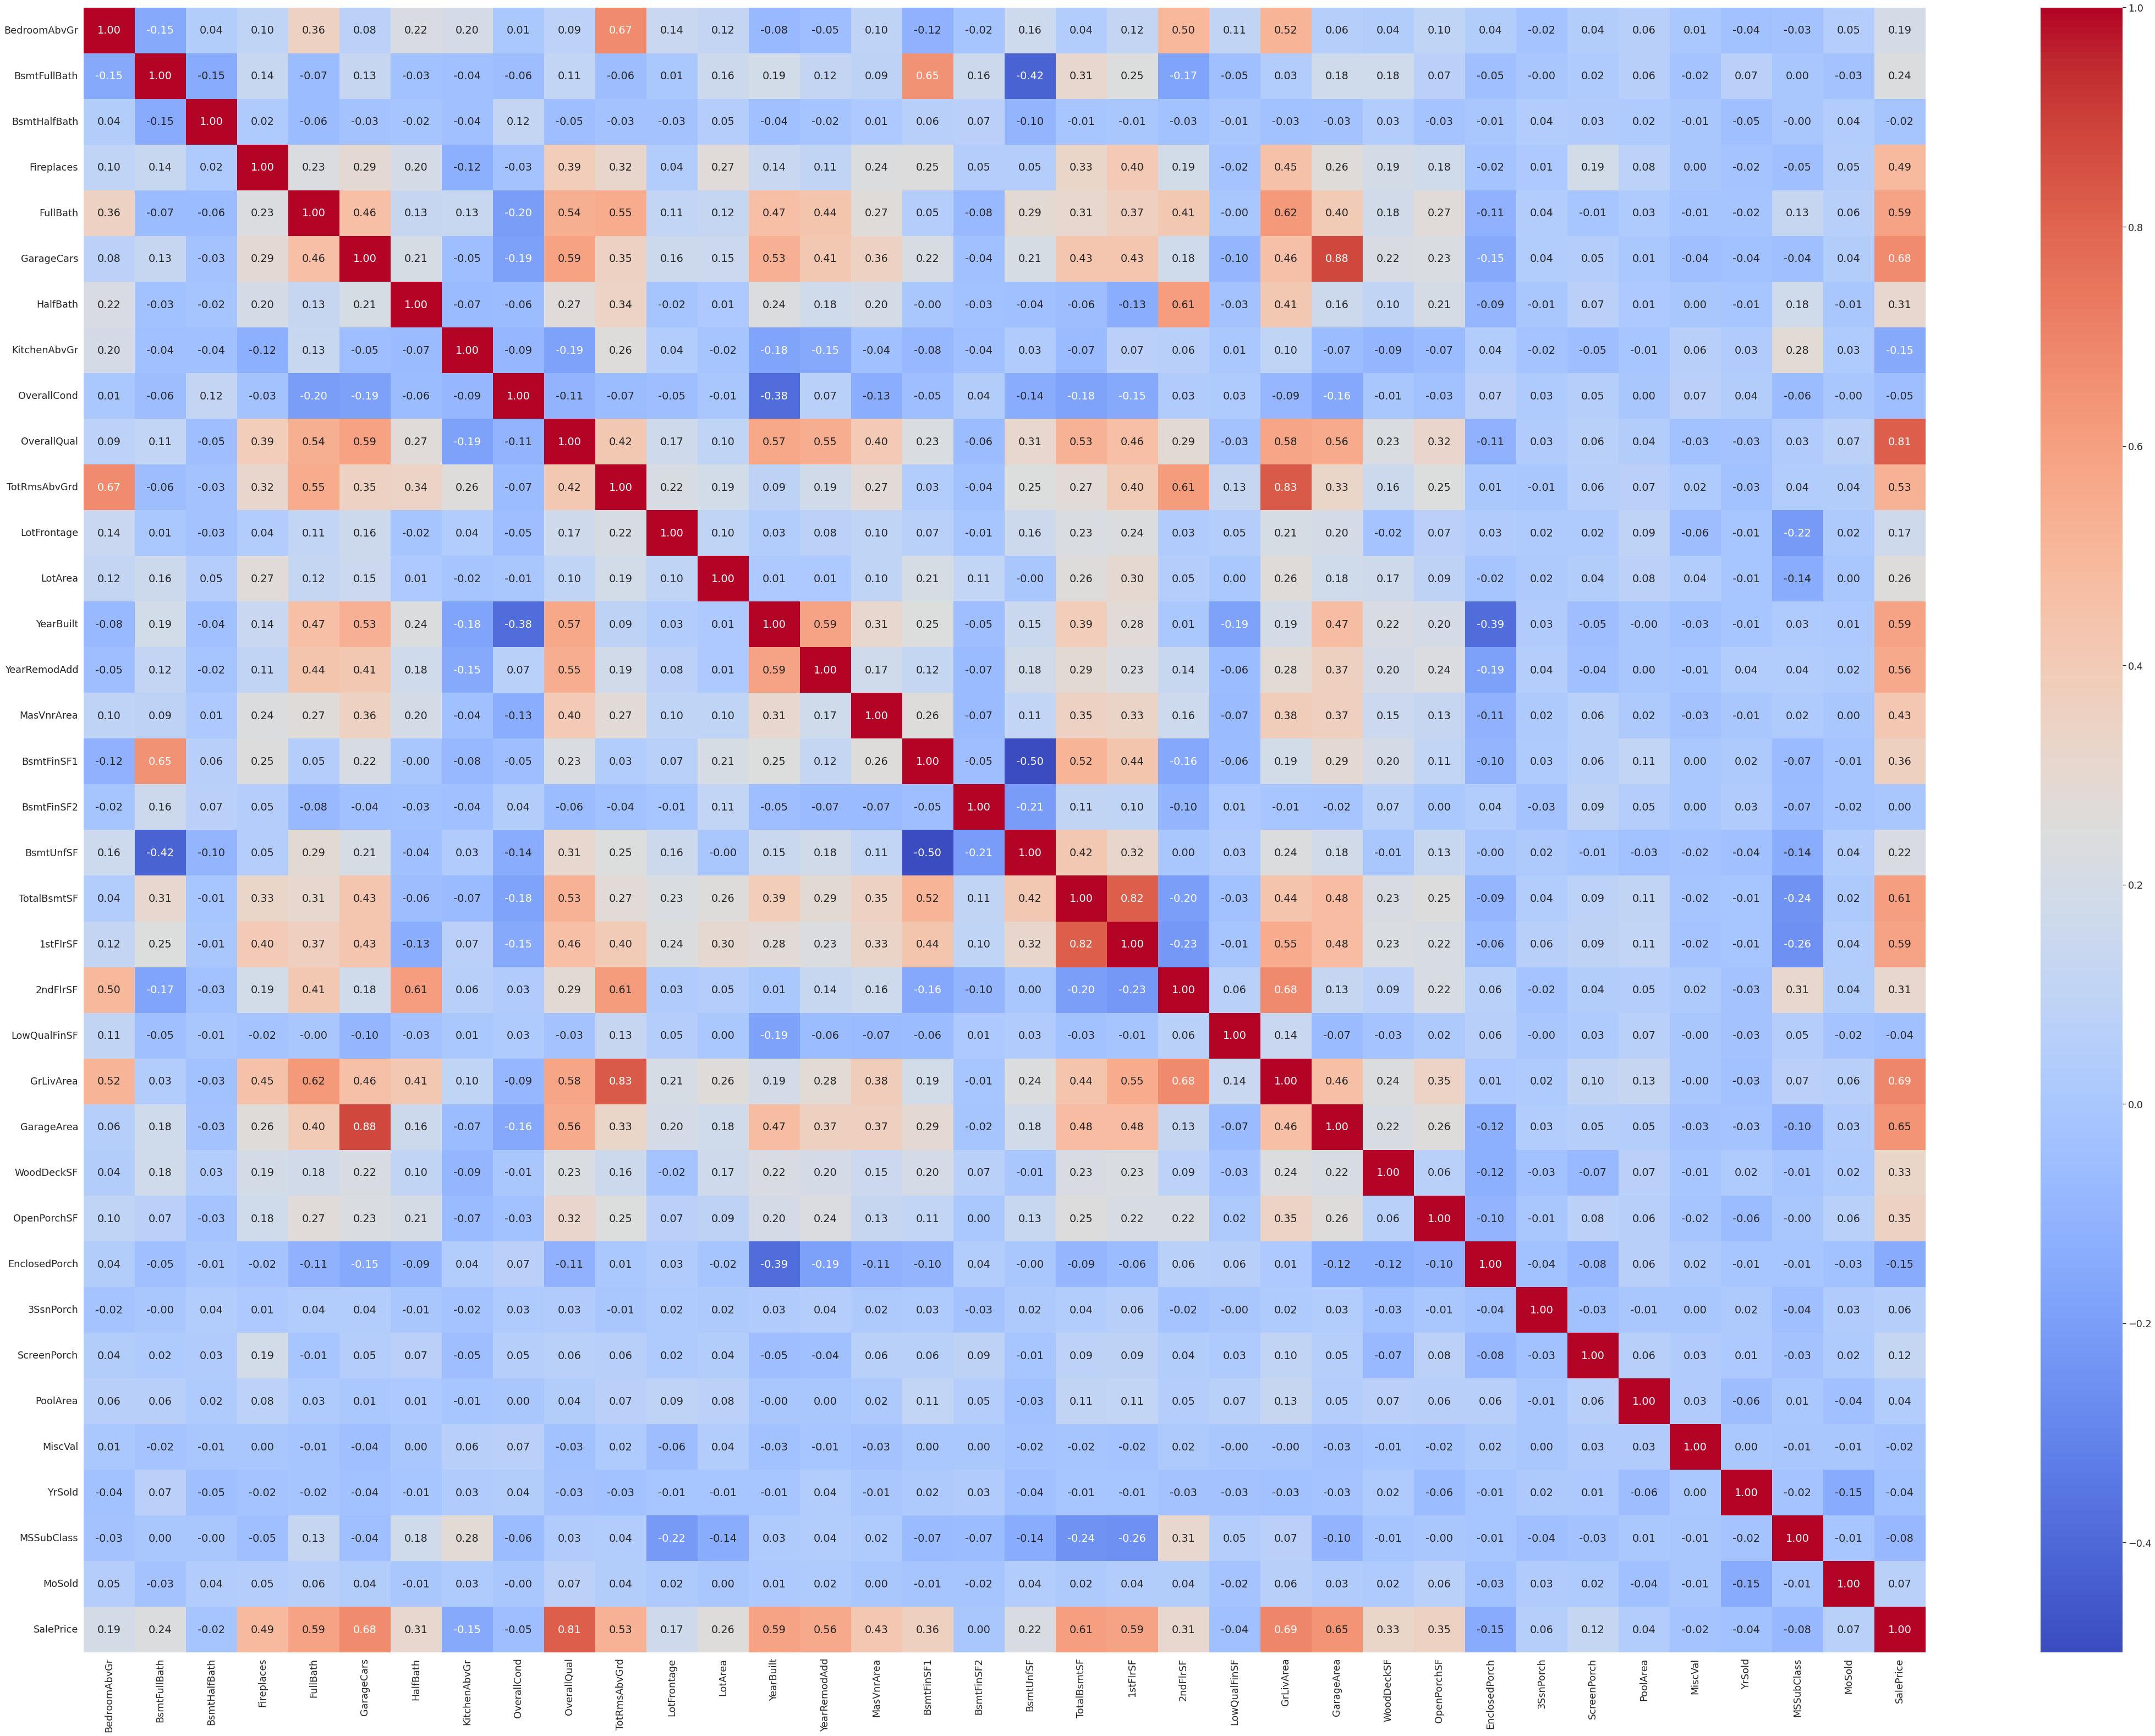

In [23]:
fig, axs = plt.subplots(1,1, figsize=(75,55))
sns.heatmap(cor,annot=True,fmt='.2f', cmap = 'coolwarm')

**Therefore OverallQuall is the most highly correlated feature with the target variable SalePrice.**

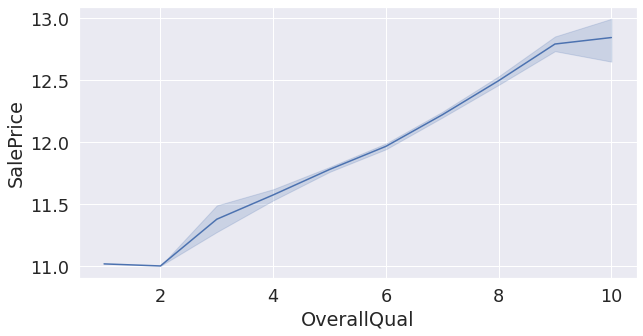

In [24]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = train, x = 'OverallQual', y = 'SalePrice')
plt.show()

### Scatter plot of Ordinal features

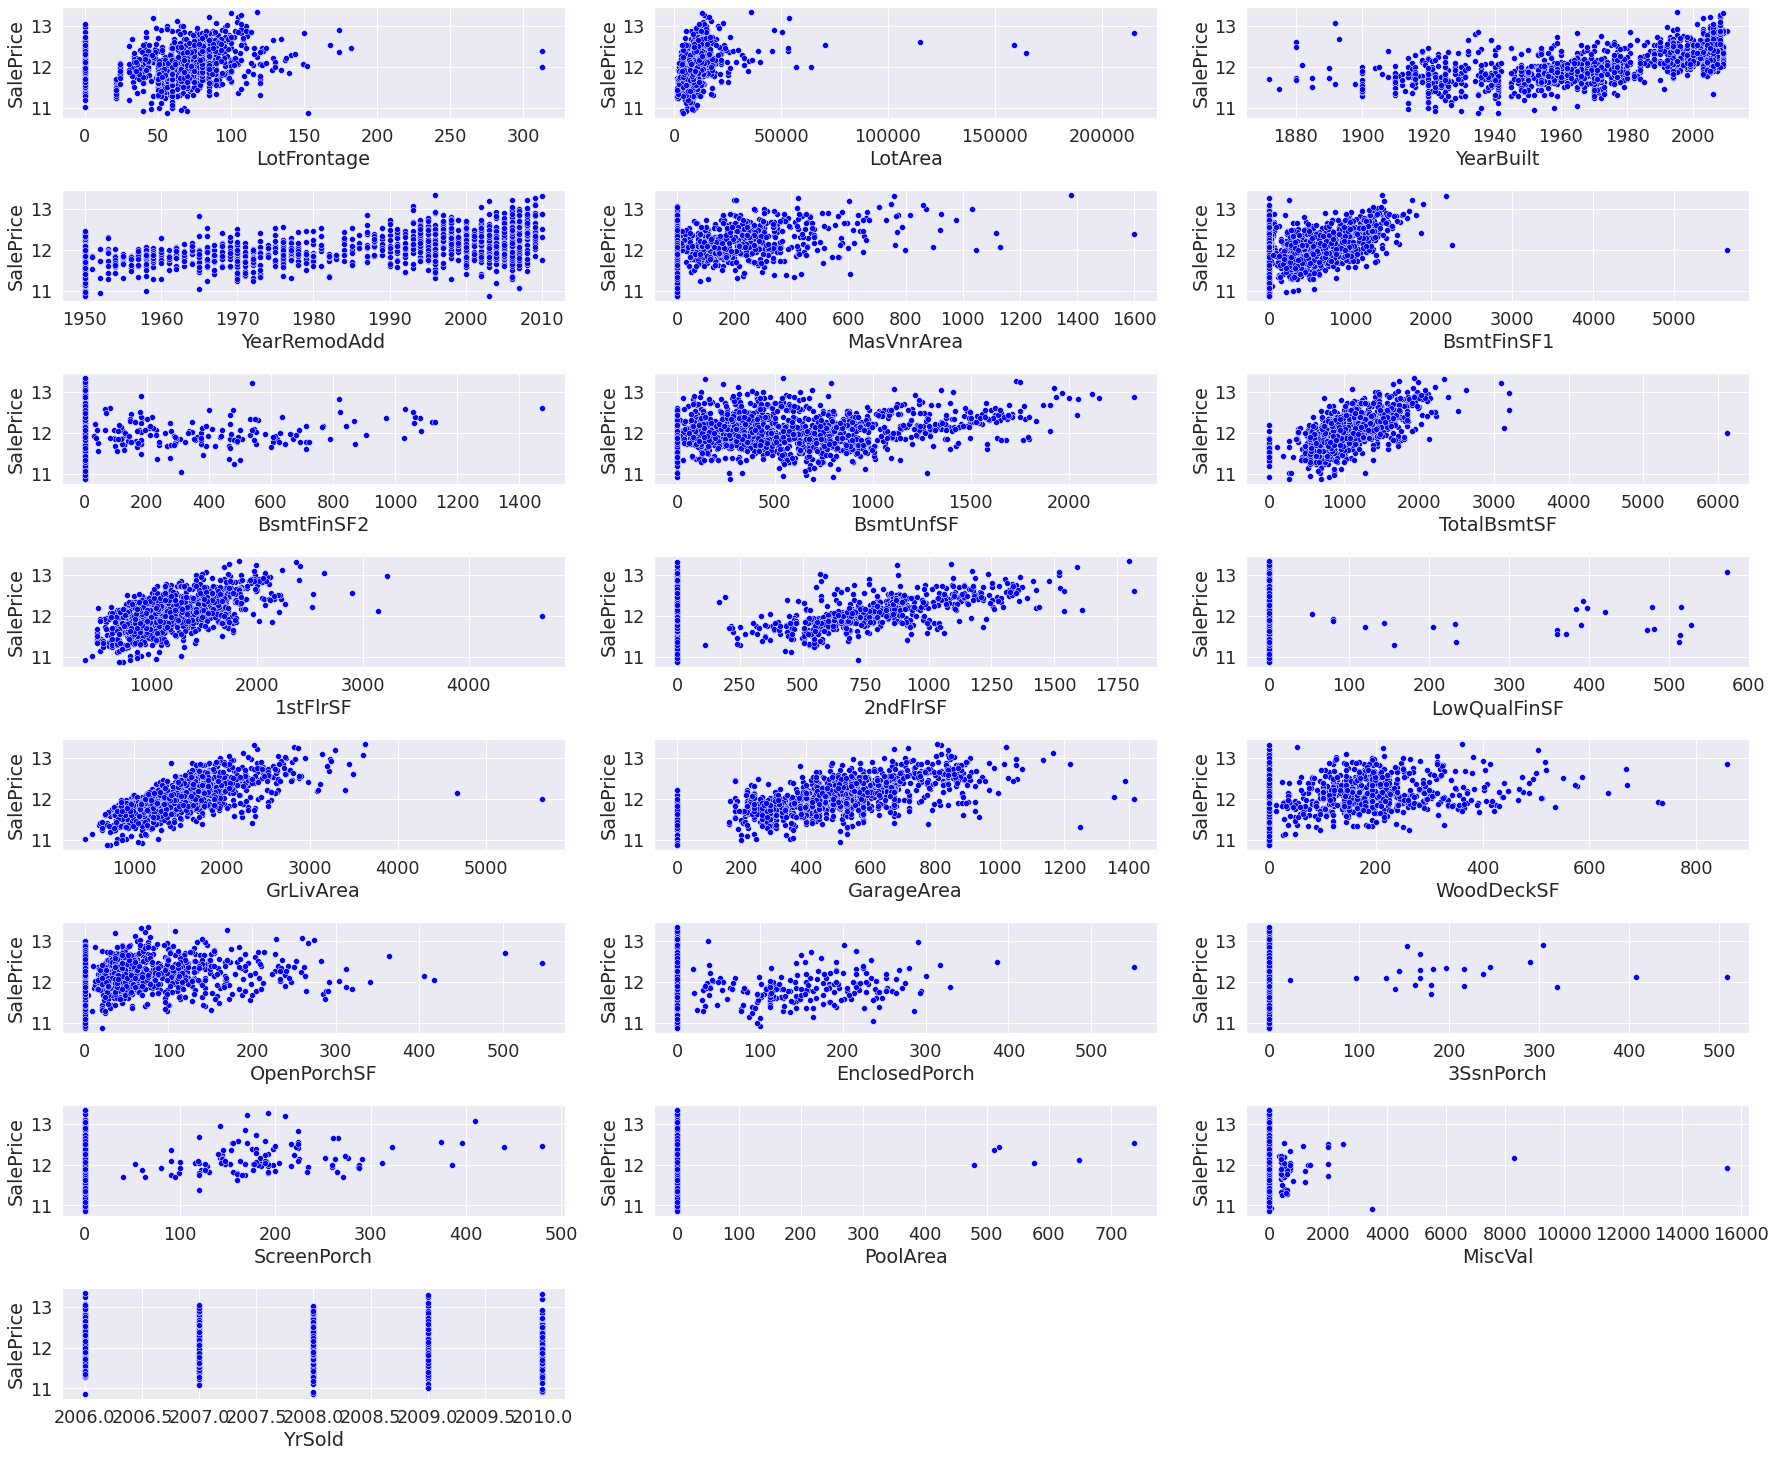

In [25]:
plt.figure(figsize = (25, 25))
for i, feature in enumerate(ordinal_features):
    plt.subplot(10, 3, i+1)
    sns.scatterplot(data = train, x = feature, y = 'SalePrice', color = 'blue')
plt.tight_layout()
plt.show()

### Remarks

SalePrice vs. 1stFirSF and SalePrice vs. GrLivArea seem to follow a trend, which can be explained by saying that "As the prices increased, so does the area".

SalePrice shows an unequal level of variance across most predictor(independent) variables - Heteroscedasticity. This is am issue multiple linear regression model. 

## Numerical Features

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

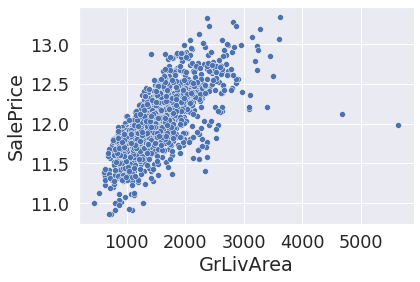

In [26]:
sns.scatterplot(data=train,x='GrLivArea', y='SalePrice')

Samples with GrLivArea greater than 4000 are obviously outliers, so delete them from our training dataset

In [27]:
train = train[train['GrLivArea'] <4000].reset_index(drop=True)

**Remove skewed parameters**

In [28]:
for feature in ordinal_features:
    if feature in ["YearBuilt", "YearRemodAdd", "YrSold"]:
        continue
    
    # if we had zero or negative value in the data, we add another column called has_zero_{feature} to the data and log non-zero values
    if (train[feature]<=0).sum()>0:
        # skip applying if we had not significant skewness
        if train.loc[train[feature]>0, feature].skew() < 0.5:
            continue
        train.loc[train[feature] > 0, feature] = np.log(train.loc[train[feature]>0, feature])

        test.loc[test[feature] > 0, feature] = np.log(test.loc[test[feature]>0, feature])

    # else we just apply log transformation
    else:
        # skip applying if we had not significant skewness
        if train[feature].skew() < 0.5:
            continue
        train[feature] = np.log(train[feature])
        test[feature] = np.log(test[feature])

## Assumptions of Regression

Linearity <br>
Homoscedasticity (absence of Heteroscedasticity).<br>
Independence of Errors <br>
Multivariate Normality <br>
Low or No Multicollinearity. <br>

The best way to solve multicollinearity from the above heatmap is to use regularization methods like Ridge or Lasso or ElasticNet.

In [29]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
robust = RobustScaler()

train[ordinal_features] = robust.fit_transform(train[ordinal_features])
test[ordinal_features] =  robust.fit_transform(test[ordinal_features])

### Encoding categorical variable

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor as lgb

## One Hot Encoding for train data

In [31]:
data_train=train.copy()
data_test = test.copy()
ohe = pd.get_dummies(data_train, columns = categorical_features)
ohe_test = pd.get_dummies(data_test, columns = categorical_features)

**Ordinal encoding**

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
oe = OrdinalEncoder()
ohe[ordinal_features] = oe.fit_transform(ohe[ordinal_features])
ohe[nominal_features] = oe.fit_transform(ohe[nominal_features])

ohe_test[ordinal_features] = oe.fit_transform(ohe_test[ordinal_features])
ohe_test[nominal_features] = oe.fit_transform(ohe_test[nominal_features])

## Concatenating Train and test dataframes

In [34]:
total_df = pd.concat([ohe,ohe_test],ignore_index=True)
display(total_df.tail())

BedroomAbvGr  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
2905           3.0       4.0           3.0           6.0           6.0   
2906           3.0       4.0           3.0           5.0           6.0   
2907           4.0       4.0           3.0           0.0           6.0   
2908           3.0       4.0           0.0           2.0           6.0   
2909           3.0       4.0           0.0           3.0           6.0   

      BsmtFullBath  BsmtHalfBath  BsmtQual  ExterCond  ExterQual  ...  \
2905           0.0           0.0       4.0        4.0        3.0  ...   
2906           0.0           0.0       4.0        4.0        3.0  ...   
2907           1.0           0.0       4.0        4.0        3.0  ...   
2908           0.0           1.0       2.0        4.0        3.0  ...   
2909           0.0           0.0       2.0        4.0        3.0  ...   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
2905             0             0            1                      0   
2906             0             0            1                      1   
2907             0             0            1                      1   
2908             0             0            1                      0   
2909             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
2905                      0                     0                     0   
2906                      0                     0                     0   
2907                      0                     0                     0   
2908                      0                     0                     0   
2909                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  MSSubClass_150  
2905                     1                      0             0.0  
2906                     0                      0             0.0  
2907                     0                      0             0.0  
2908                     1                      0             0.0  
2909                     1                      0             0.0  

[5 rows x 256 columns]

In [35]:
total_df.drop(columns=['MSSubClass_150'],inplace=True)

## Training 

In [36]:
# Return data to train and test

train_df = total_df[:len(ohe)]
display(train_df.head())
test_df = total_df[len(ohe):]
display(test_df.head())

BedroomAbvGr  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
0           3.0       4.0           3.0           2.0           6.0   
1           3.0       4.0           1.0           0.0           6.0   
2           3.0       4.0           2.0           2.0           6.0   
3           3.0       1.0           3.0           0.0           6.0   
4           4.0       4.0           0.0           2.0           6.0   

   BsmtFullBath  BsmtHalfBath  BsmtQual  ExterCond  ExterQual  ...  \
0           1.0           0.0       2.0        4.0        2.0  ...   
1           0.0           1.0       2.0        4.0        3.0  ...   
2           1.0           0.0       2.0        4.0        2.0  ...   
3           1.0           0.0       4.0        4.0        3.0  ...   
4           1.0           0.0       2.0        4.0        2.0  ...   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 255 columns]

BedroomAbvGr  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
1451           2.0       4.0           3.0           5.0           3.0   
1452           3.0       4.0           3.0           0.0           6.0   
1453           3.0       4.0           3.0           2.0           6.0   
1454           3.0       4.0           3.0           2.0           6.0   
1455           2.0       4.0           3.0           0.0           6.0   

      BsmtFullBath  BsmtHalfBath  BsmtQual  ExterCond  ExterQual  ...  \
1451           0.0           0.0       4.0        4.0        3.0  ...   
1452           0.0           0.0       4.0        4.0        3.0  ...   
1453           0.0           0.0       2.0        4.0        3.0  ...   
1454           0.0           0.0       4.0        4.0        3.0  ...   
1455           0.0           0.0       2.0        4.0        2.0  ...   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1451               0             0             0            1   
1452               0             0             0            1   
1453               0             0             0            1   
1454               0             0             0            1   
1455               0             0             0            1   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
1451                      0                      0                     0   
1452                      0                      0                     0   
1453                      0                      0                     0   
1454                      0                      0                     0   
1455                      0                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
1451                     0                     1                      0  
1452                     0                     1                      0  
1453                     0                     1                      0  
1454                     0                     1                      0  
1455                     0                     1                      0  

[5 rows x 255 columns]

In [37]:
train_df['SalePrice'] = train['SalePrice']
train_df.shape,test_df.shape

((1451, 255), (1459, 255))

In [38]:
train_df.SalePrice.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

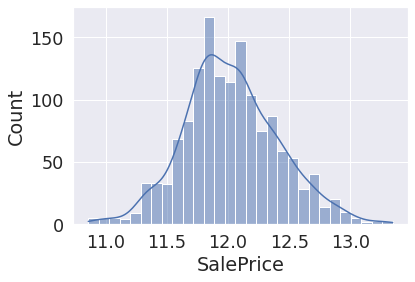

In [39]:
sns.histplot(train_df['SalePrice'], kde =True)

**Modeling**

In [40]:
x = train_df.drop(columns=['SalePrice'],axis=1)
y = train_df['SalePrice']

# Modelling

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [43]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1160, 254), (1160,), (291, 254), (291,))

**Linear Regression with L1 regularization**

In [44]:
from sklearn.linear_model import Lasso,LinearRegression,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [45]:
def regression_metrics(y_test,y_pred):
    print('explained_variance: ', round(explained_variance_score(y_test,y_pred),4))  
    print('r2: ', round(r2_score(y_test,y_pred),4))
    print("MAE:\t",round(mean_absolute_error(y_test,y_pred),4))
    print("MSE:\t",round(mean_squared_error(y_test,y_pred),4))
    print("RMSE:\t",round(np.sqrt(mean_squared_error(y_test,y_pred)),4))


In [46]:
def cv_evaluate(model, param_grid, x_train, y_train, x_test, y_test, model_name, k_folds=5, scoring='neg_mean_squared_error', fit_parameters={}):

    model_cv = GridSearchCV(model, param_grid, cv=k_folds, scoring= scoring, refit=True)
    model_cv.fit(x_train, y_train, **fit_parameters)
    y_train_pred = model_cv.predict(x_train)
    y_test_pred = model_cv.predict(x_test)

    print('Score = ', 1-np.abs(model_cv.score(x_train, y_train)))
    print("Training metrics:\n")
    regression_metrics(y_train ,y_train_pred)
    print("Testing metrics:\n")
    regression_metrics(y_test ,y_test_pred)
    return model_cv

**Linear regression + L1 Regularization**

In [47]:
lasso = Lasso(random_state=20, max_iter=10000)
learning_rate = np.logspace(-4, -0.01, 50)
param_grid = [{'alpha': learning_rate}]

lasso_model = cv_evaluate(lasso, param_grid, x_train, y_train, x_test, y_test, 'Lasso')

Score =  0.9895147565254412
Training metrics:

explained_variance:  0.9318
r2:  0.9318
MAE:	 0.0731
MSE:	 0.0105
RMSE:	 0.1024
Testing metrics:

explained_variance:  0.9388
r2:  0.9383
MAE:	 0.0683
MSE:	 0.0082
RMSE:	 0.0905


**Ridge - Linear Regression + L2 Regularization**

In [48]:
ridge = Ridge(random_state=20, max_iter=10000)
learning_rate = np.logspace(-4, -0.01, 50)
param_grid = [{'alpha': learning_rate}]

ridge_model = cv_evaluate(ridge, param_grid, x_train, y_train, x_test, y_test, 'Ridge')

Score =  0.9908966594303319
Training metrics:

explained_variance:  0.9408
r2:  0.9408
MAE:	 0.0682
MSE:	 0.0091
RMSE:	 0.0954
Testing metrics:

explained_variance:  0.9364
r2:  0.9361
MAE:	 0.0697
MSE:	 0.0085
RMSE:	 0.0921


**Decision tree Regressor**

In [49]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth = 8).fit(x_train, y_train)

train_pred = tree.predict(x_train)
print('Score = ', tree.score(x_train, y_train))

predict_tree = tree.predict(x_test)

Score =  0.9576315821920997


In [50]:
regression_metrics(y_test,predict_tree)

explained_variance:  0.7395
r2:  0.7359
MAE:	 0.1368
MSE:	 0.0351
RMSE:	 0.1872


Overfitting has occured in Decision tree model

**RandomForest**

In [51]:
n_estimators = [5, 20, 50, 100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = np.arange(10,130,10) # maximum number of levels allowed in decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

In [52]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, random_state = 42, n_jobs = -1)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=42)

In [55]:
train_pred = rf_random.predict(x_train)
print('Score = ', rf_random.score(x_train, y_train))

Score =  1.0


In [56]:
predictions = rf_random.predict(x_test)
regression_metrics(y_test,predictions)

explained_variance:  0.9062
r2:  0.904
MAE:	 0.0826
MSE:	 0.0128
RMSE:	 0.1129


In [57]:
test_df = test_df[x_test.columns]

## XGBoost

In [58]:
from xgboost import XGBRegressor as xgr

In [59]:
xgr_model = xgr()

In [60]:
xgr_model.fit(x_train, y_train)

train_pred = xgr_model.predict(x_train)
print('Score = ', xgr_model.score(x_train, y_train))

predict = xgr_model.predict(x_test)
regression_metrics(y_test,predict)

Score =  0.9993619438308767
explained_variance:  0.9119
r2:  0.911
MAE:	 0.081
MSE:	 0.0118
RMSE:	 0.1087


## LightGradient Boosting

In [61]:
lgb_model = lgb()

In [62]:
param_grid = {'learning_rate':[0.01], 'num_iterations': [10000], 'n_estimators': [25], 'num_leaves': [40],'colsample_bytree':[0.4], 'subsample': [0.4], 'max_depth': [6]} 

model_lgb = cv_evaluate(lgb_model, param_grid, x_train, y_train, x_test, y_test, 'LGBM', fit_parameters={'eval_set':[(x_test, y_test)], 'eval_metric':'l1'})

[1]	valid_0's l1: 0.284402	valid_0's l2: 0.130573
[2]	valid_0's l1: 0.281778	valid_0's l2: 0.128289
[3]	valid_0's l1: 0.279211	valid_0's l2: 0.126075
[4]	valid_0's l1: 0.276759	valid_0's l2: 0.124031
[5]	valid_0's l1: 0.274656	valid_0's l2: 0.12228
[6]	valid_0's l1: 0.272113	valid_0's l2: 0.120166
[7]	valid_0's l1: 0.270319	valid_0's l2: 0.118671
[8]	valid_0's l1: 0.267967	valid_0's l2: 0.116765
[9]	valid_0's l1: 0.265659	valid_0's l2: 0.114854
[10]	valid_0's l1: 0.263317	valid_0's l2: 0.112985
[11]	valid_0's l1: 0.261184	valid_0's l2: 0.111287
[12]	valid_0's l1: 0.258893	valid_0's l2: 0.10946
[13]	valid_0's l1: 0.25664	valid_0's l2: 0.107699
[14]	valid_0's l1: 0.254391	valid_0's l2: 0.105953
[15]	valid_0's l1: 0.252156	valid_0's l2: 0.104214
[16]	valid_0's l1: 0.250013	valid_0's l2: 0.102623
[17]	valid_0's l1: 0.247786	valid_0's l2: 0.100953
[18]	valid_0's l1: 0.245629	valid_0's l2: 0.0992809
[19]	valid_0's l1: 0.243488	valid_0's l2: 0.097668
[20]	valid_0's l1: 0.241284	valid_0's l2: 

**CatBoost**

In [63]:
import catboost
from catboost import CatBoostRegressor as cbr

In [64]:
# param_grid = {'learning_rate':[0.01], 'num_iterations': [1000], 'n_estimators': [25],'colsample_bytree':[0.7], 'reg_alpha':[0.5], 'reg_lambda':[1.0], 'subsample': [0.7], 'max_depth': [6]} 

cbr_model = cbr().fit(x_train,y_train)
train_pred = cbr_model.predict(x_train)
print("Score:", cbr_model.score(x_train,y_train))
test_pred = cbr_model.predict(x_test)
regression_metrics(y_test,test_pred)


Learning rate set to 0.041914
0:	learn: 0.3823553	total: 55.3ms	remaining: 55.2s
1:	learn: 0.3719712	total: 59.2ms	remaining: 29.5s
2:	learn: 0.3627278	total: 62.8ms	remaining: 20.9s
3:	learn: 0.3531441	total: 66.3ms	remaining: 16.5s
4:	learn: 0.3439469	total: 69.7ms	remaining: 13.9s
5:	learn: 0.3349253	total: 73.4ms	remaining: 12.2s
6:	learn: 0.3269318	total: 76.9ms	remaining: 10.9s
7:	learn: 0.3189210	total: 80.7ms	remaining: 10s
8:	learn: 0.3107605	total: 84.5ms	remaining: 9.31s
9:	learn: 0.3030400	total: 88.3ms	remaining: 8.74s
10:	learn: 0.2958409	total: 92.9ms	remaining: 8.35s
11:	learn: 0.2891954	total: 96.5ms	remaining: 7.94s
12:	learn: 0.2821122	total: 99.9ms	remaining: 7.58s
13:	learn: 0.2760220	total: 103ms	remaining: 7.29s
14:	learn: 0.2703092	total: 107ms	remaining: 7.05s
15:	learn: 0.2643279	total: 111ms	remaining: 6.83s
16:	learn: 0.2586532	total: 115ms	remaining: 6.63s
17:	learn: 0.2533665	total: 118ms	remaining: 6.44s
18:	learn: 0.2483605	total: 122ms	remaining: 6.28s


**Light GBM Output**

In [65]:
prediction_lgb = model_lgb.predict(test_df)
submission_lgb = pd.DataFrame({'Id': test_copy.Id, 'SalePrice': np.exp(prediction_lgb)})
submission_lgb.to_csv(path_or_buf = 'submission.csv', index = False)
pd.read_csv('submission.csv')

Id      SalePrice
0     1461  123855.289789
1     1462  146683.171544
2     1463  185543.278339
3     1464  194137.753902
4     1465  190500.200459
...    ...            ...
1454  2915   81998.623838
1455  2916   91425.796523
1456  2917  153191.357371
1457  2918  111427.782553
1458  2919  223456.016416

[1459 rows x 2 columns]